# Simple Examples

These examples show what UnitfulRecipes is all about.

First we need to tell Julia we are using Plots, Unitful, and UnitfulRecipes

In [1]:
using Plots, Unitful, UnitfulRecipes

## Simplest plot

This is the most basic example

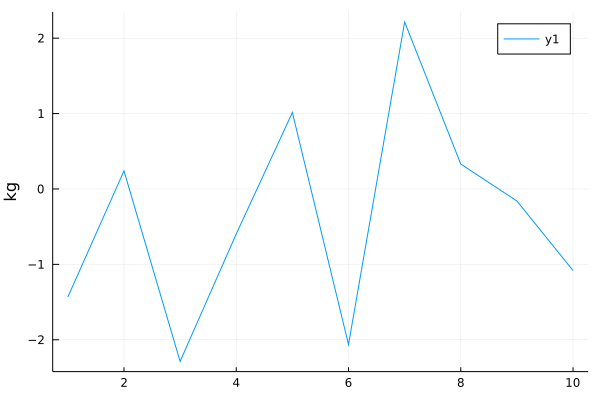

In [2]:
y = randn(10)*u"kg"
plot(y)

Add some more plots, and it will be aware of the units you used previously (note `y2` is about 10 times smaller than `y1`)

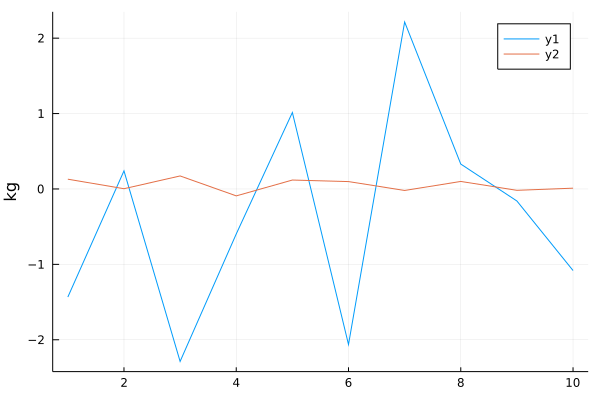

In [3]:
y2 = 100randn(10)*u"g"
plot!(y2)

UnitfulRecipes will not allow you to plot with different unit-dimensions, so
```julia
plot!(rand(10)*u"m")
```
won't work here.

But you can add inset subplots with different axes that have different dimensions

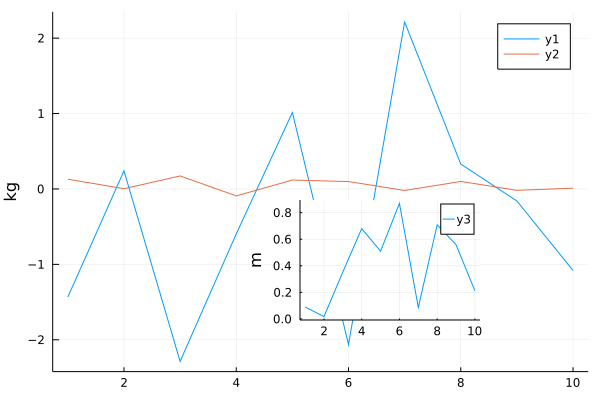

In [4]:
plot!(rand(10)*u"m", inset=bbox(0.5, 0.5, 0.3, 0.3), subplot=2)

## Axis label

If you specify an axis label, the unit will be appended to it.

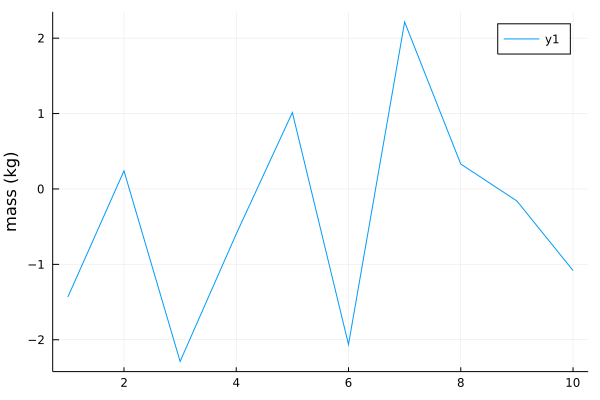

In [5]:
plot(y, ylabel="mass")

Unless you want it untouched, in which case you can use a "protected" string using the `@P_str` macro.

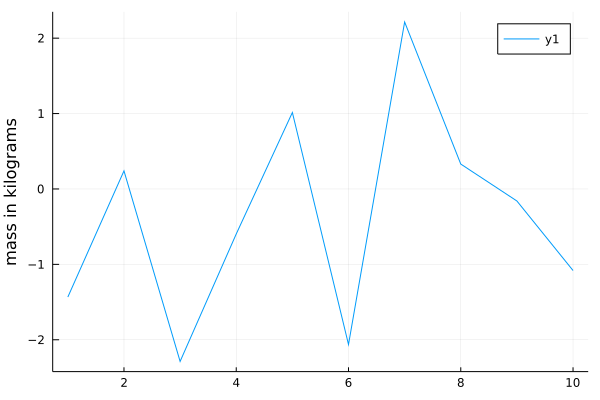

In [6]:
plot(y, ylabel=P"mass in kilograms")

Just like with the `label` keyword for legends, no axis label is added if you specify the axis label to be an empty string.

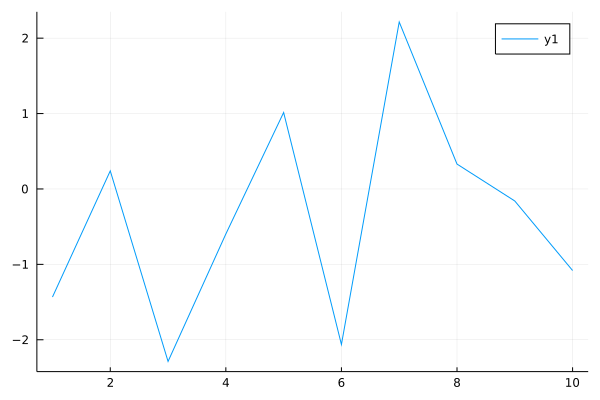

In [7]:
plot(y, ylabel="")

### Unit formatting

If you prefer some other formatting over the round parentheses, you can
supply a keyword `unitformat`, which can be a number of different things:

`unitformat` can be a boolean or `nothing`:

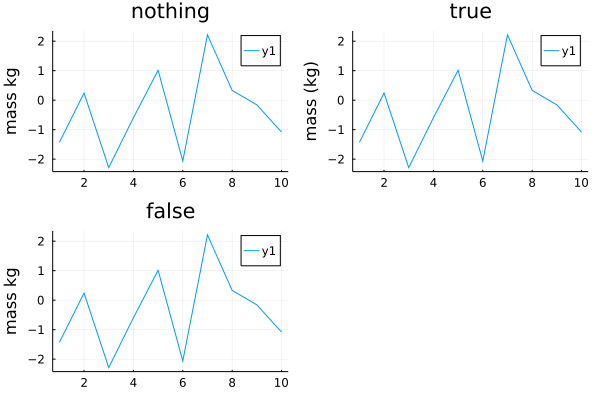

In [8]:
plot([plot(y, ylab="mass", title=repr(s), unitformat=s) for s in (nothing, true, false)]...)

`unitformat` can be one of a number of predefined symbols, defined in

In [9]:
URsymbols = keys(UnitfulRecipes.UNIT_FORMATS)

KeySet for a Dict{Symbol, Any} with 10 entries. Keys:
  :verbose
  :round
  :slashround
  :slashsquare
  :angle
  :slashcurly
  :slash
  :slashangle
  :square
  :curly

which correspond to these unit formats:

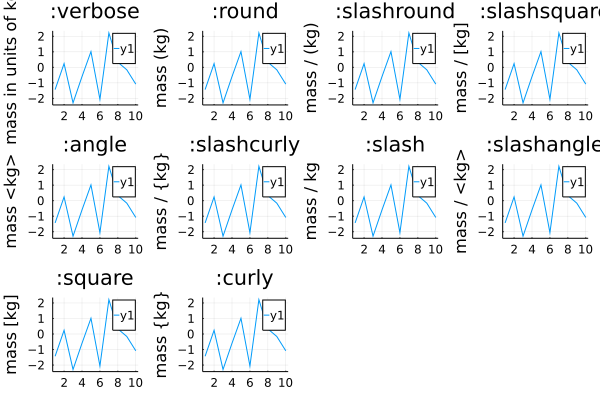

In [10]:
plot([plot(y, ylab="mass", title=repr(s), unitformat=s) for s in URsymbols]...)

`unitformat` can also be a `Char`, a `String`, or a `Tuple` (of `Char`s or
`String`s), which will be inserted around the label and unit depending on the
length of the tuple:

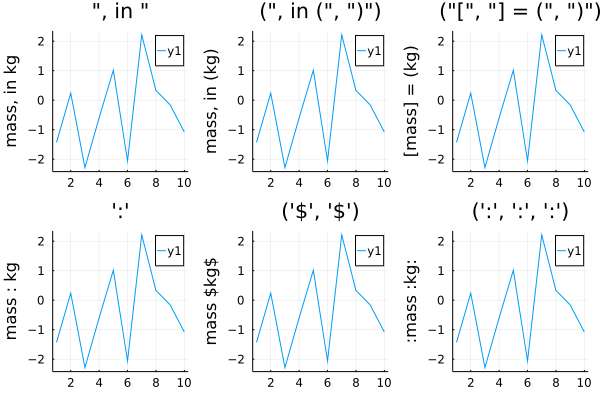

In [11]:
URtuples = [", in ", (", in (", ")"), ("[", "] = (", ")"), ':', ('$', '$'), (':', ':', ':')]
plot([plot(y, ylab="mass", title=repr(s), unitformat=s) for s in URtuples]...)

For *extreme* customizability, you can also supply a function that turns two
arguments (label, unit) into a string:

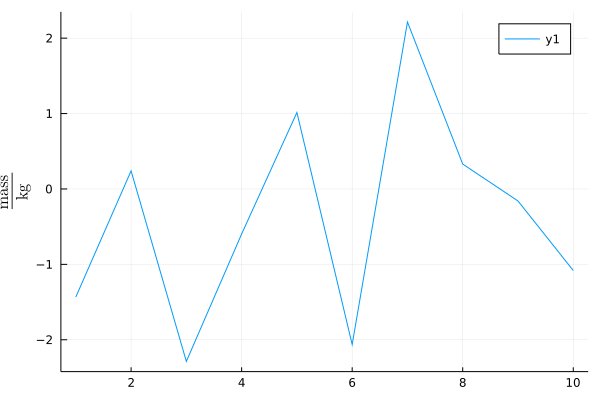

In [12]:
formatter(l, u) = string("\$\\frac{\\textrm{", l, "}}{\\mathrm{", u, "}}\$")
plot(y, ylab="mass", unitformat=formatter)

## Axis unit

You can use the axis-specific keyword arguments to convert units on the fly

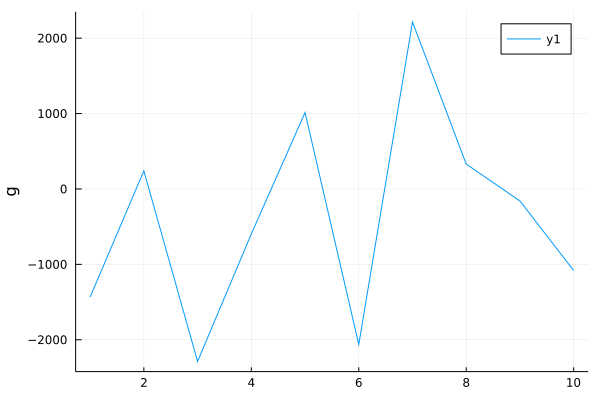

In [13]:
plot(y, yunit=u"g")

## Axis limits

Setting the axis limits can be done with units

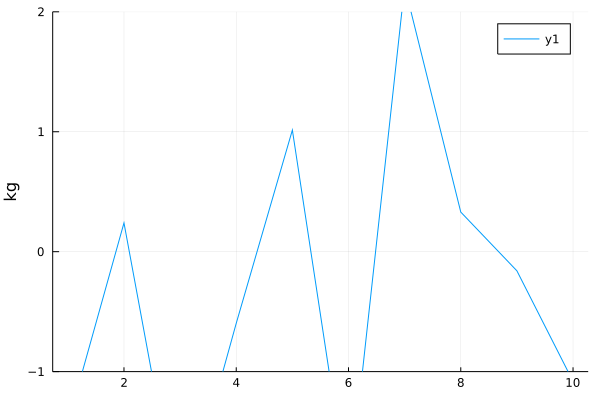

In [14]:
plot(y, ylims=(-1000u"g",2000u"g"))

or without

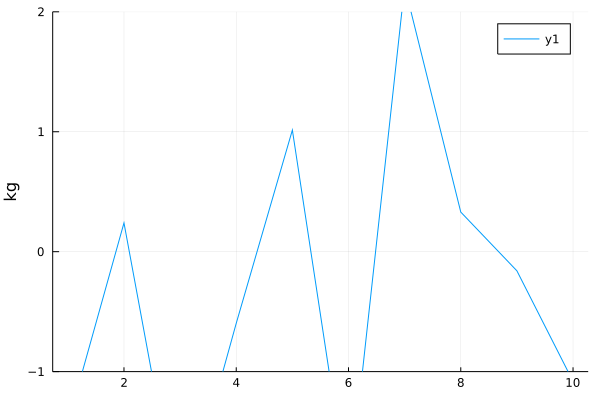

In [15]:
plot(y, ylims=(-1,2))

## Multiple series

You can plot multiple series as 2D arrays

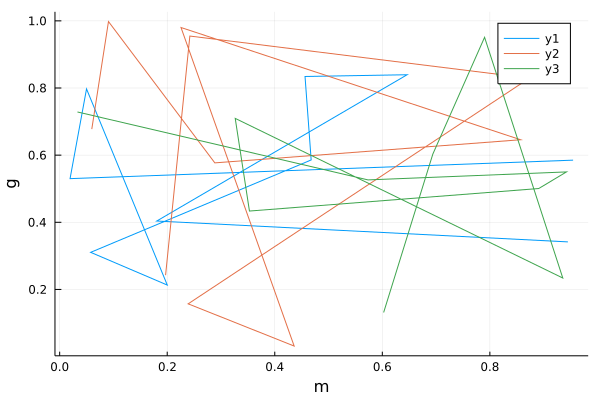

In [16]:
x, y = rand(10,3)*u"m", rand(10,3)*u"g"
plot(x, y)

Or vectors of vectors (of potnetially different lengths)

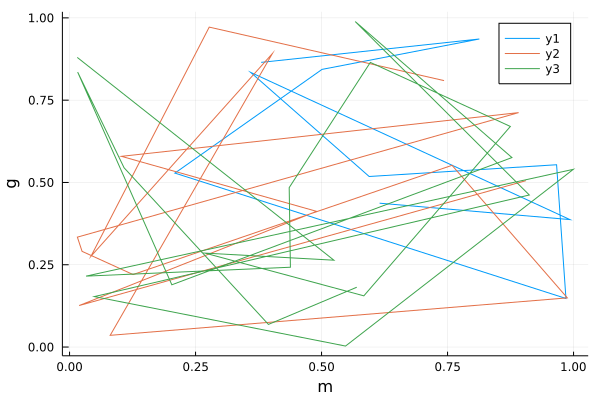

In [17]:
x, y = [rand(10), rand(15), rand(20)]*u"m", [rand(10), rand(15), rand(20)]*u"g"
plot(x, y)

## 3D

It works in 3D

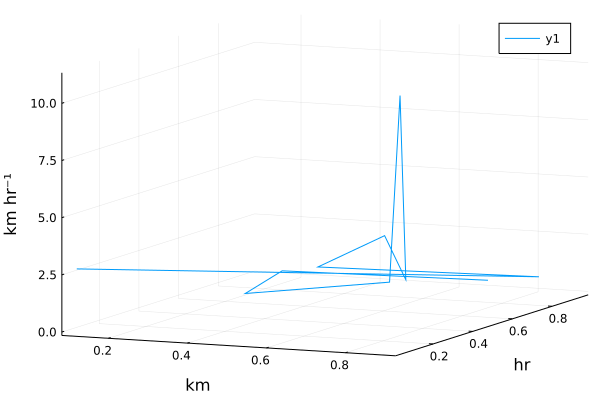

In [18]:
x, y = rand(10)*u"km", rand(10)*u"hr"
z = x ./ y
plot(x, y, z)

## Scatter plots

You can do scatter plots

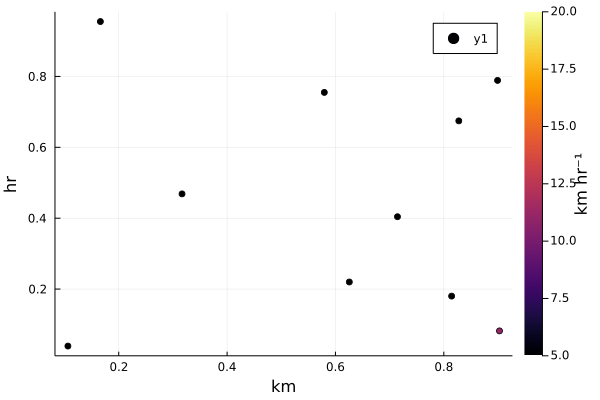

In [19]:
scatter(x, y, zcolor=z, clims=(5,20).*unit(eltype(z)))

and 3D scatter plots too

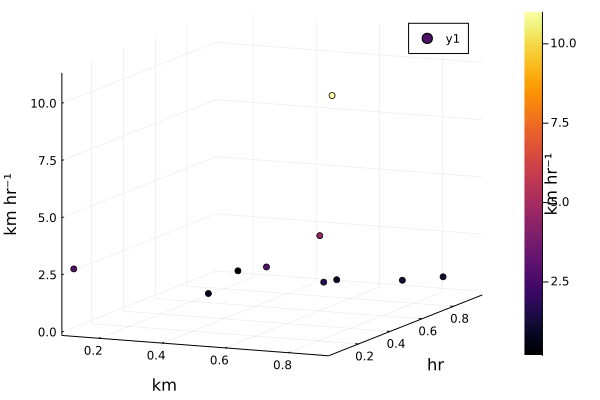

In [20]:
scatter(x, y, z, zcolor=z)

## Contour plots

for contours plots

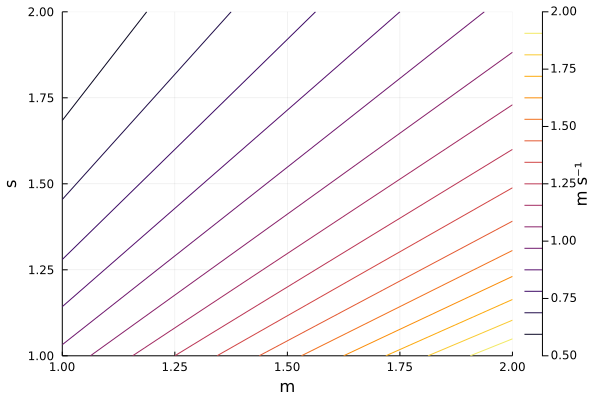

In [21]:
x, y = (1:0.01:2)*u"m", (1:0.02:2)*u"s"
z = x' ./ y
contour(x, y, z)

and filled contours

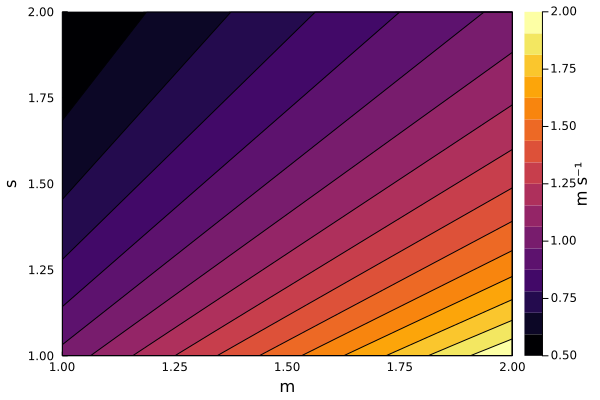

In [22]:
contourf(x, y, z)

## Error bars

For example, you can use the `yerror` keyword argument with units,
which will be converted to the units of `y` and plot your errorbars:

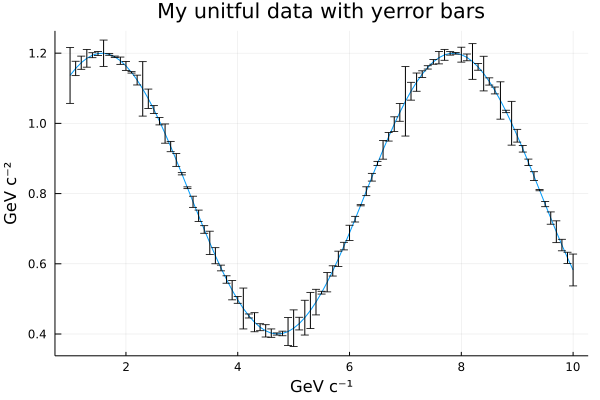

In [23]:
using Unitful: GeV, MeV, c
x = (1.0:0.1:10) * GeV/c
y = @. (2 + sin(x / (GeV/c))) * 0.4GeV/c^2 # a sine to make it pretty
yerror = 10.9MeV/c^2 * exp.(randn(length(x))) # some noise for pretty again
plot(x, y; yerror, title="My unitful data with yerror bars", lab="")

## Functions

In order to plot a unitful function on a unitful axis, supply as a second argument a
vector of unitful sample points, or the unit for the independent axis:

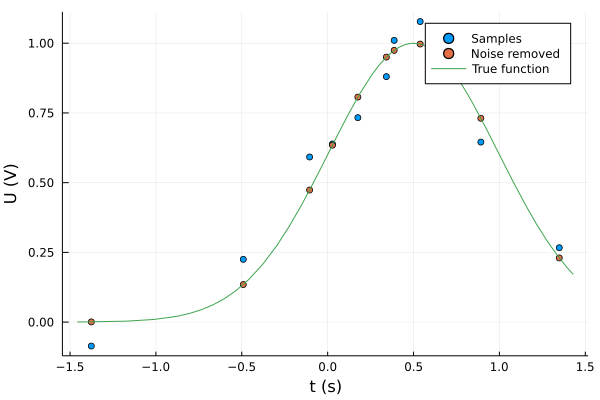

In [24]:
model(x) = 1u"V"*exp(-((x-0.5u"s")/0.7u"s")^2)
t = randn(10)u"s" # Sample points
U = model.(t) + randn(10)u"dV" .|> u"V" # Noisy acquicisions
plot(t, U; xlabel="t", ylabel="U", st=:scatter, label="Samples")
plot!(model, t; st=:scatter, label="Noise removed")
plot!(model, u"s"; label="True function")

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*